### 단순 선형회귀 -당뇨병 사례

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

- 당뇨병 데이터셋 탐색

In [2]:
from sklearn.datasets import load_diabetes
diabetes =load_diabetes()
df= pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
df['target']=diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [3]:
#데이터 프레임(DataFrame)의 각 열(column)에 대한 요약 통계 정보를 보여주는 메서드입니다. 기본적으로, describe()는 열의 갯수, 평균(mean), 표준편차(std), 최소값(min), 제1사분위수(25%), 중앙값(50%), 제3사분위수(75%), 최대값(max)
df.describe()          # 정규화 N(0,0.0476)로 이미 정규화

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [4]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

- 10개의 feature와 target간의 상관관계도

In [5]:
fig,axs =plt.subplots(2,5,figsize=(16,8))
for i,feature in enumerate(df.columns[:-1]):
    row,col =i //5,i % 5
    sns.regplot(x=feature,y='target',data=df,ax=axs[row][col])

- 10개 feature vs. target

In [6]:
from sklearn.linear_model import LinearRegression
lr =LinearRegression()

In [7]:
#각 frature와 target의 선형회귀를 했을때의 R squared value
for feature in df.columns[:-1]:
    X = df[feature].values.reshape(-1,1)
    lr.fit(X,diabetes.target)
    score = lr.score(X,diabetes.target)
    print(f'{feature}:{score:.4f}')


age:0.0353
sex:0.0019
bmi:0.3439
bp:0.1949
s1:0.0450
s2:0.0303
s3:0.1559
s4:0.1853
s5:0.3202
s6:0.1463


### BMI  vs target

훈련/테스트 데이터셋 분리(test_size =0.1)

In [8]:
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test =train_test_split(
    df.bmi.values.reshape(-1,1),diabetes.target,test_size=0.2,random_state=2023
)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((353, 1), (89, 1), (353,), (89,))

In [9]:
lr =LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [10]:
# 가중치 계수,바이어스(편향,절편)
lr.coef_,lr.intercept_

(array([934.31985305]), 152.34582045693807)

In [11]:
# R squared 
lr.score(X_test,y_test)

0.3017494407564788

In [12]:
# R squared,MSE
from sklearn.metrics import r2_score,mean_squared_error
pred =lr.predict(X_test)
r2_score(y_test,pred),mean_squared_error(y_test,pred)


(0.3017494407564788, 4885.231185945094)

- 시각화

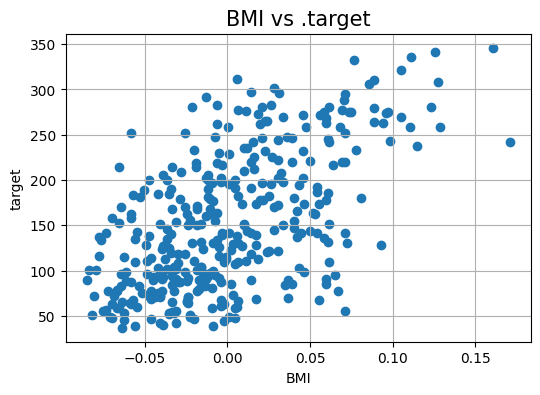

In [13]:
plt.figure(figsize=(6,4))
plt.scatter(X_train,y_train)
plt.grid()
plt.xlabel('BMI'),plt.ylabel('target')
plt.title('BMI vs .target',fontsize =15)
plt.show()

In [14]:
xs =np.array([-0.1,0.18])
ys=np.dot(lr.coef_[0],xs) + lr.intercept_
ys

array([ 58.91383515, 320.52339401])

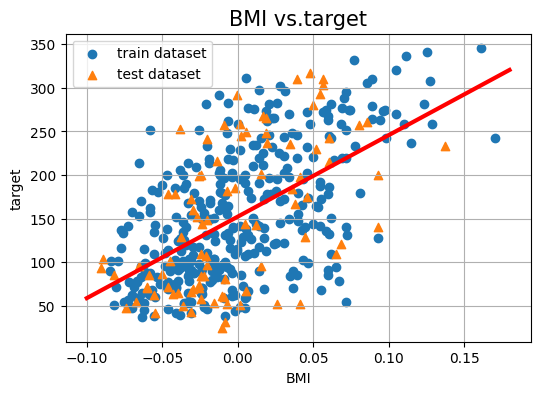

In [15]:
plt.figure(figsize=(6,4))
plt.scatter(X_train,y_train,label ='train dataset')
plt.plot(xs,ys,'r-',lw=3)
plt.scatter(X_test,y_test,marker='^',label='test dataset')
plt.grid(),plt.legend()
plt.xlabel('BMI'),plt.ylabel('target')
plt.title('BMI vs.target',fontsize =15)
plt.show()

##### BP VS target

In [16]:
X_train2,X_test2,y_train2,y_test2=train_test_split(
    df.bp.values.reshape(-1,1),diabetes.target,test_size=0.1,random_state=2023
)
lr.fit(X_train2,y_train2)
pred2 =lr.predict(X_test2)

In [17]:
r2_score(y_test, pred), r2_score(y_test2, pred2)

(0.3017494407564788, 0.23653913651290792)

In [18]:
df.bp.min(),df.bp.max()

(-0.11239880254408448, 0.13204361674121307)

In [19]:
xs2 = np.array([-0.12,0.14])
ys2 = np.dot(lr.coef_[0],xs) + lr.intercept_
ys2

array([ 82.00229112, 276.64928396])

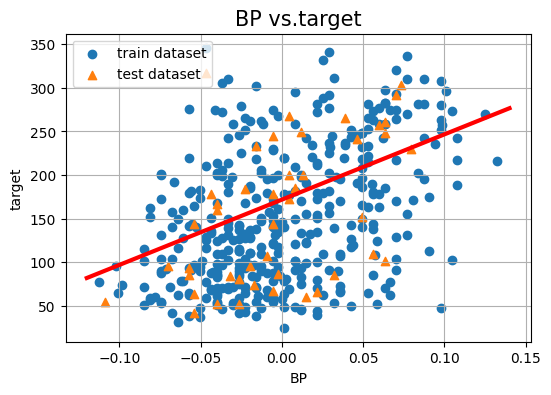

In [20]:
plt.figure(figsize=(6,4))
plt.scatter(X_train2,y_train2,label ='train dataset')
plt.plot(xs2,ys2,'r-',lw=3)
plt.scatter(X_test2,y_test2,marker='^',label='test dataset')
plt.grid(),plt.legend()
plt.xlabel('BP'),plt.ylabel('target')
plt.title('BP vs.target',fontsize =15)
plt.show()

##### BMI.BP 지표 비교

In [21]:
r2_score(y_test,pred),r2_score(y_test2,pred2)

(0.3017494407564788, 0.23653913651290792)

In [22]:
mean_squared_error(y_test,pred),mean_squared_error(y_test2,pred2)


(4885.231185945094, 4949.622719963431)

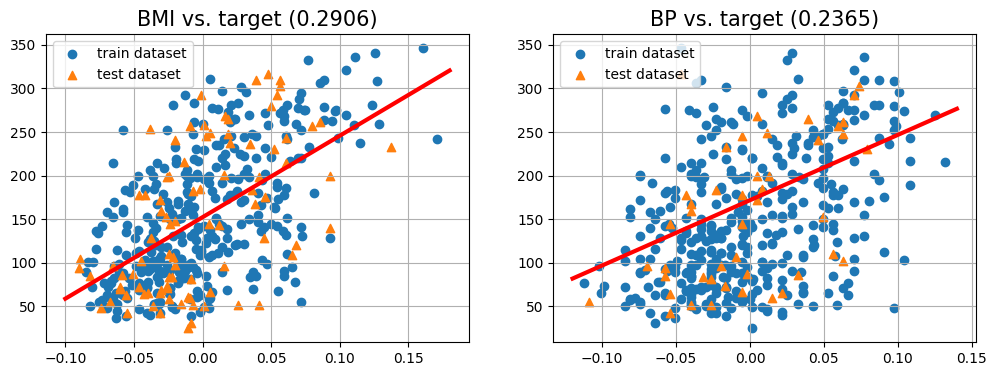

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].scatter(X_train, y_train, label='train dataset')
ax[0].scatter(X_test, y_test, marker='^', label='test dataset')
ax[0].plot(xs, ys, 'r-', lw=3)
ax[0].grid(), ax[0].legend()
ax[0].set_title('BMI vs. target (0.2906)', fontsize=15)   # Rsquar값 = 0.2906
ax[1].scatter(X_train2, y_train2, label='train dataset')
ax[1].scatter(X_test2, y_test2, marker='^', label='test dataset')
ax[1].plot(xs2, ys2, 'r-', lw=3)
ax[1].grid(), ax[1].legend()
ax[1].set_title('BP vs. target (0.2365)', fontsize=15)  # Rsquar값 = 0.2365
plt.show()
